<a href="https://colab.research.google.com/github/kimbaorrr/colab_exercises/blob/main/Other%20Notebooks/nhan_dien_bai_trac_nghiem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

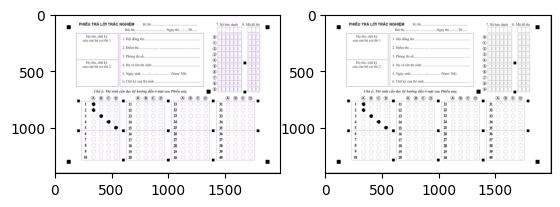

In [ ]:
# Nạp ảnh & chuyển ảnh xám
raw_image = cv.imread('/content/drive/MyDrive/TF_Training/sample_img/tn.JPG', cv.COLOR_RGB2BGR)
gray_image = cv.cvtColor(raw_image, cv.COLOR_BGR2GRAY)

plt.subplot(1, 2, 1)
plt.imshow(raw_image)
plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.show()

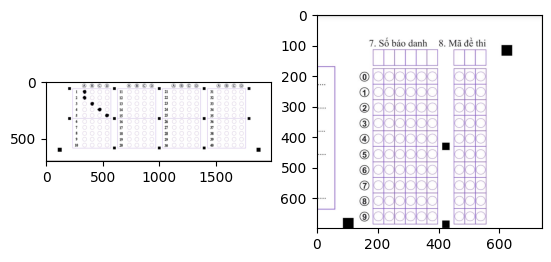

In [ ]:
# Tách ảnh thành các vùng để xử lý
h, w, channels = raw_image.shape

trac_nghiem = raw_image[h//2:, :]
thong_tin = raw_image[:h//2, 255-w//2:]

gray_trac_nghiem = cv.cvtColor(trac_nghiem, cv.COLOR_RGB2GRAY)

plt.subplot(1, 2, 1)
plt.imshow(trac_nghiem)
plt.subplot(1, 2, 2)
plt.imshow(thong_tin)
plt.show()

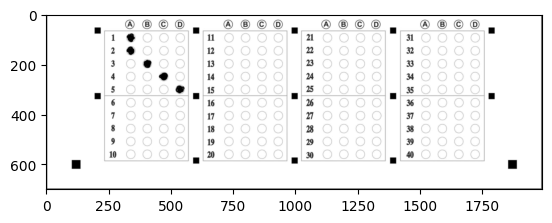

In [ ]:
gauss_trac_nghiem = cv.GaussianBlur(gray_trac_nghiem, (3, 3), 0)

plt.imshow(gauss_trac_nghiem, cmap='gray')
plt.show()

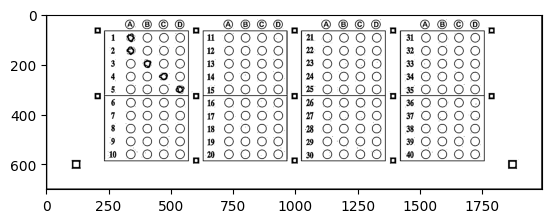

In [ ]:
# Lọc ngưỡng thích ứng
thresh_trac_nghiem = cv.adaptiveThreshold(gauss_trac_nghiem, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 15, 2)

plt.imshow(thresh_trac_nghiem, cmap='gray')
plt.show()

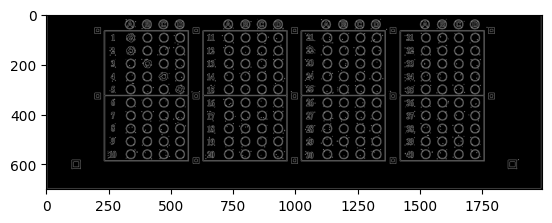

In [ ]:
# Phát hiện các cạnh bằng Canny Edge
edge_trac_nghiem = cv.Canny(thresh_trac_nghiem, 150, 200)

plt.imshow(edge_trac_nghiem, cmap='gray')
plt.show()

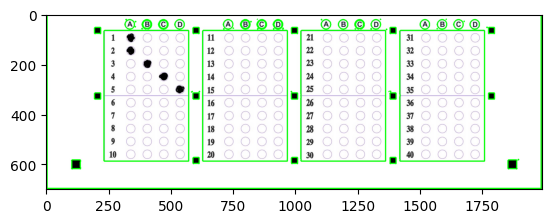

In [ ]:
# Tìm các contours từng block trắc nghiệm (mỗi block 10 câu)

trac_nghiem_copy = trac_nghiem.copy()
contours, _ = cv.findContours(edge_trac_nghiem, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[:30]
cv.drawContours(trac_nghiem_copy, contours, -1, (0, 255, 0), 3)

plt.imshow(trac_nghiem_copy)
plt.show()

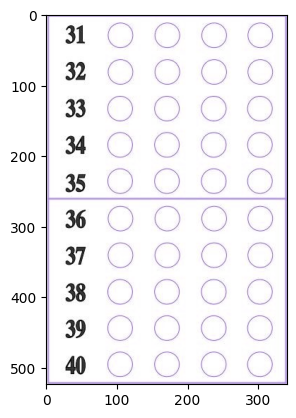

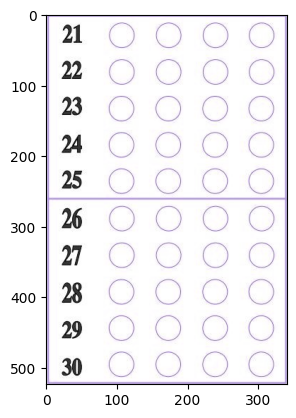

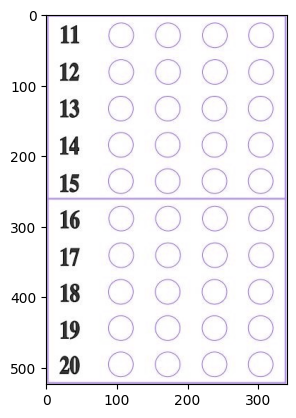

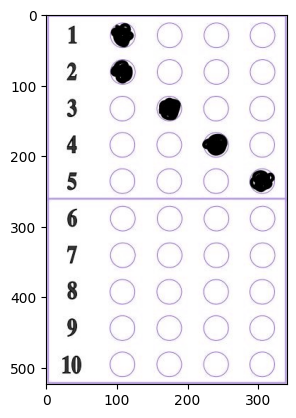

In [ ]:
# Lọc contours vị trí các block, thêm vào mảng để lưu trữ & đảo ngược mảng
trac_nghiem_block_10c = []

for i in range(len(contours)):
  x, y, w, h = cv.boundingRect(contours[i])
  if 340 <= w <= 341 and 520 <= h <= 525:
    im = trac_nghiem[y: y + h, x: x + w]
    plt.imshow(im)
    plt.show()
    trac_nghiem_block_10c.append([x, y, w, h])

trac_nghiem_block_10c = trac_nghiem_block_10c[::-1] # Đảo ngược thứ tự block

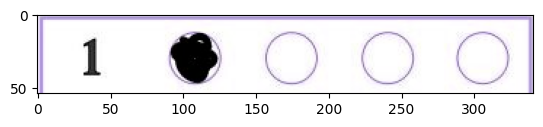

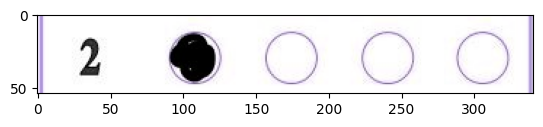

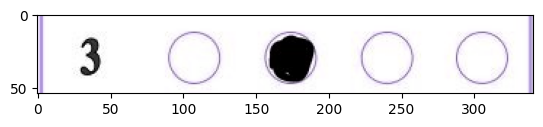

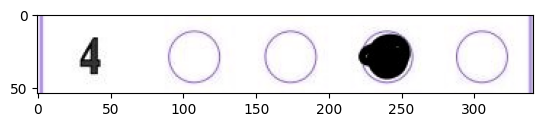

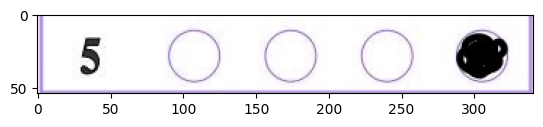

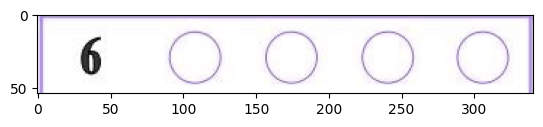

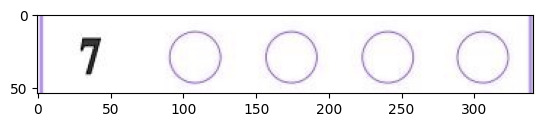

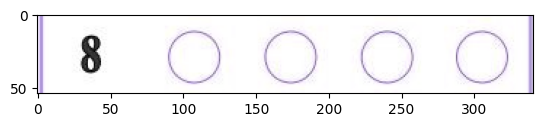

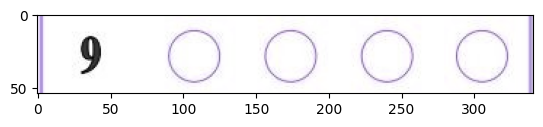

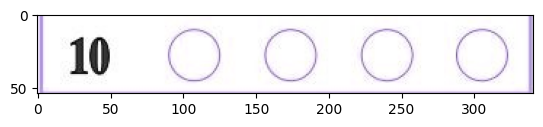

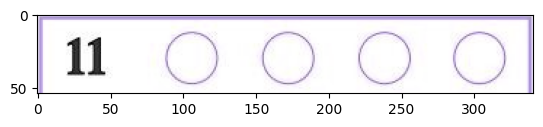

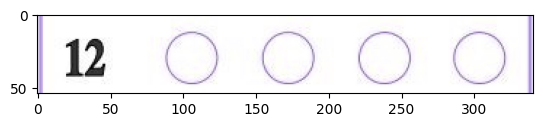

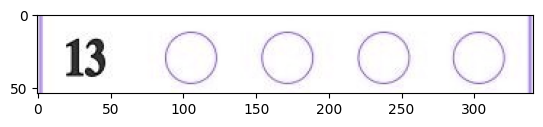

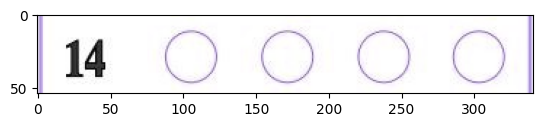

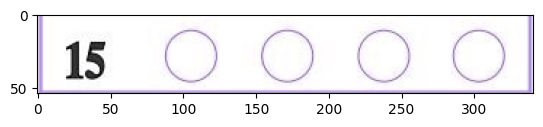

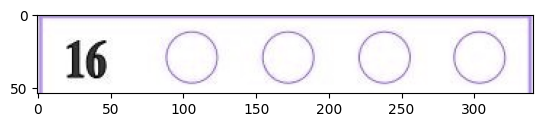

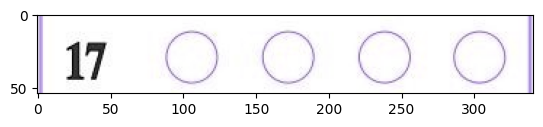

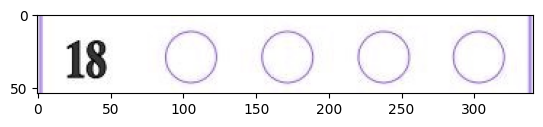

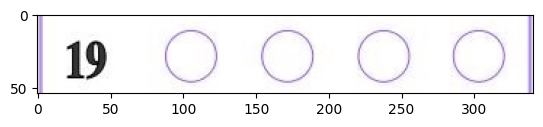

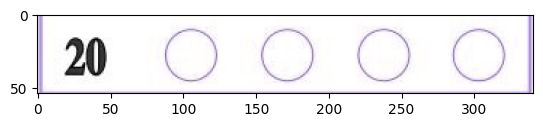

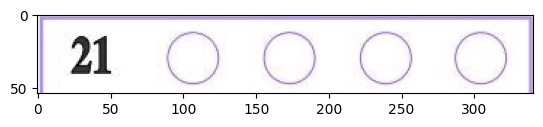

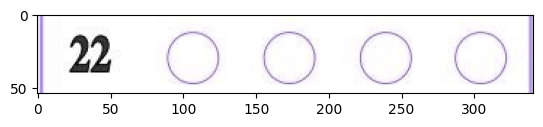

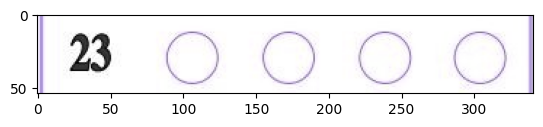

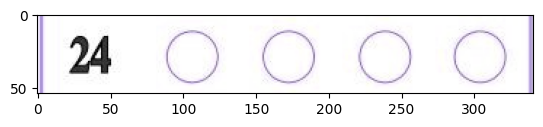

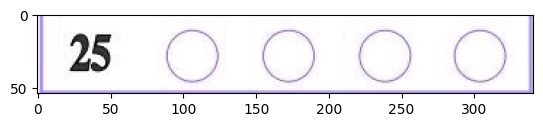

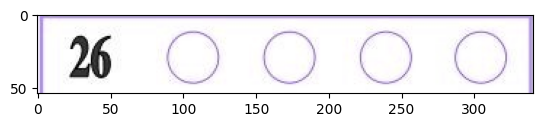

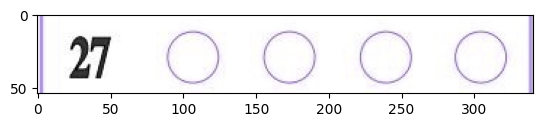

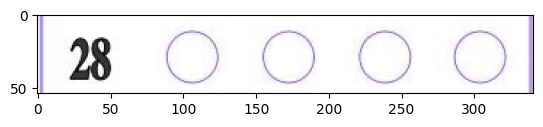

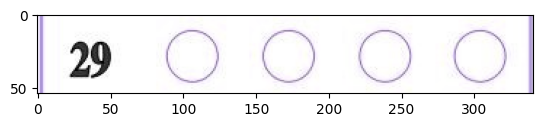

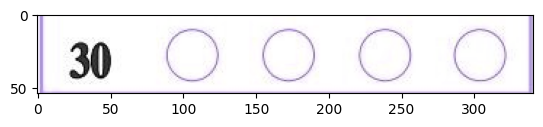

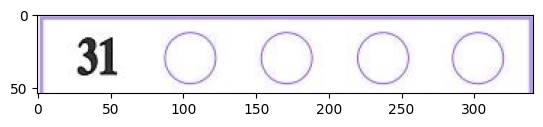

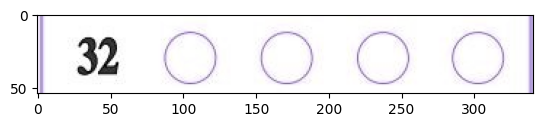

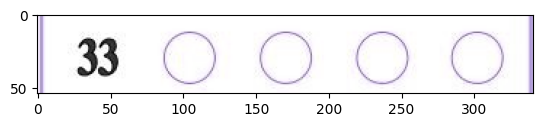

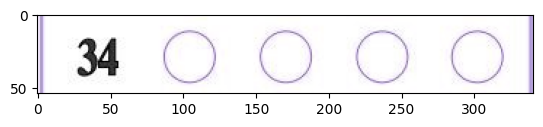

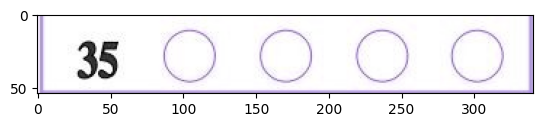

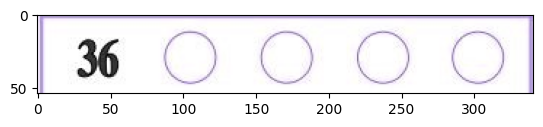

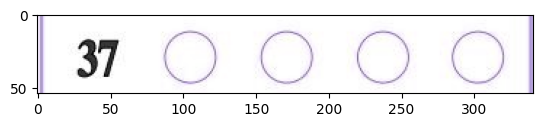

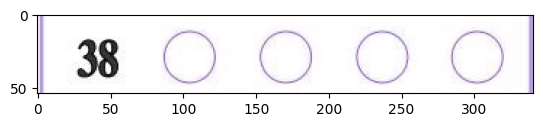

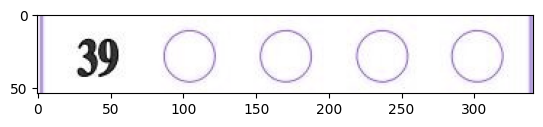

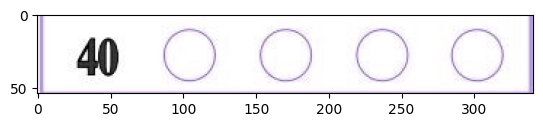

In [ ]:
# Tách từng dòng câu trả lời của mỗi block

raw_answers = []
gauss_answers = []
answer_h = 54 # Ngưỡng giới hạn chiều cao của mỗi ô tròn

for x, y, w, h in trac_nghiem_block_10c:
  for i in range(1, 11):
    if i != 1:
      y+=52 # Dịch chuyển xuống câu trả lời kế tiếp
    im = trac_nghiem[y: y + answer_h, x: x + w]
    im_gauss = gauss_trac_nghiem[y: y + answer_h, x: x + w]
    gauss_answers.append(im_gauss)
    raw_answers.append(im)
    plt.imshow(im)
    plt.show()

In [ ]:
# Dùng threshold & minMaxLoc để xác định tọa độ có mức xám cao nhất
# => ta truy xuất được đáp án của câu đó
chosen_answers = {}

i = 1
for c in gauss_answers:
  _, c_thresh = cv.threshold(c, 100, 255, cv.THRESH_BINARY)
  _, _, minMax, _ = cv.minMaxLoc(c_thresh)
  if 12 <= minMax[1] <= 20:
    if 90 <= minMax[0] <= 110:
      chosen_answers[i] = 'A'
    elif 168 <= minMax[0] <= 173:
      chosen_answers[i] = 'B'
    elif 235 <= minMax[0] <= 240:
      chosen_answers[i] = 'C'
    elif 290 <= minMax[0] <= 310:
      chosen_answers[i] = 'D'
    else:
      chosen_answers[i] = ''
  i+=1

print(chosen_answers)

{1: 'A', 2: 'A', 3: 'B', 4: 'C', 5: 'D', 6: '', 7: '', 8: '', 9: '', 10: '', 11: '', 12: '', 13: '', 14: '', 15: '', 16: '', 17: '', 18: '', 19: '', 20: '', 21: '', 22: '', 23: '', 24: '', 25: '', 26: '', 27: '', 28: '', 29: '', 30: '', 31: '', 32: '', 33: '', 34: '', 35: '', 36: '', 37: '', 38: '', 39: '', 40: ''}


In [246]:
correct_answers = {
    1: 'A',
    2: 'A',
    3: 'B',
    4: 'C',
    5: 'D',
    6: 'D',
    7: 'D'
}

wrong = 0
correct = 0

for i in range(1, 41):
  if not correct_answers.get(i) == chosen_answers.get(i):
    wrong += 1

correct = 40 - wrong
your_point = 10 / 40 * correct

print('Số câu đúng:',correct)
print('Số câu sai:',wrong)
print('=> Điểm của bạn:',your_point)

Số câu đúng: 5
Số câu sai: 35
=> Điểm của bạn: 1.25
